In [1]:
%matplotlib inline

In [2]:
from pathlib import Path
import re
import matplotlib.pyplot as plt
from matplotlib import pyplot
import eelbrain
import mne
from eelbrain import *
#import trftools
from eelbrain import testnd

from pprint import pprint
import numpy as np
from scipy import stats
import pandas as pd

/Users/neuroling/anaconda3/envs/eelbrain/lib/python3.11/site-packages/eelbrain/mne_fixes/_interpolation.py:13: FutureWarning: mne.io.pick.pick_types is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  from mne.io.pick import pick_types, pick_channels
/Users/neuroling/anaconda3/envs/eelbrain/lib/python3.11/site-packages/eelbrain/mne_fixes/_interpolation.py:13: FutureWarning: mne.io.pick.pick_channels is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  from mne.io.pick import pick_types, pick_channels


In [3]:
## Load in ESLs data ##

#STIMULI = [str(i) for i in range(1, 13)]
#DATA_ROOT = Path("/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results")  #Path("~").expanduser() / 'Data' / 'Alice'
DATA_ROOT = Path("/Users/neuroling/Downloads/DINGHSIN_Results/Alice_Experiments_Results")
#PREDICTOR_audio_DIR = DATA_ROOT / 'TRFs_pridictors/audio_predictors'
#PREDICTOR_word_DIR = DATA_ROOT / 'TRFs_pridictors/word_predictors'
EEG_DIR = DATA_ROOT / 'EEG_ESLs' / 'Alice_ESL_ICAed_fif'
IMF_DIR = DATA_ROOT/ "TRFs_pridictors/IF_predictors"
F0_DIR = DATA_ROOT/ "TRFs_pridictors/F0_predictors"
IMFsLIST = [path.name for path in IMF_DIR.iterdir() if re.match(r'Alice_IF_IMF_*', path.name)] 
ESL_SUBJECTS = [path.name for path in EEG_DIR.iterdir() if re.match(r'n_2_S\d*', path.name)]  #S01_alice-raw.fif

# Define a target directory for TRF estimates and make sure the directory is created
TRF_DIR = DATA_ROOT / 'TRFs_ESLs'
TRF_DIR.mkdir(exist_ok=True)
print(ESL_SUBJECTS)
print(len(ESL_SUBJECTS))  # 26
DST = TRF_DIR / 'ESLs_figures'
DST.mkdir(exist_ok=True)

['n_2_S030_ICAed_raw.fif', 'n_2_S027_ICAed_raw.fif', 'n_2_S023_ICAed_raw.fif', 'n_2_S034_ICAed_raw.fif', 'n_2_S024_ICAed_raw.fif', 'n_2_S019_ICAed_raw.fif', 'n_2_S020_ICAed_raw.fif', 'n_2_S013_ICAed_raw.fif', 'n_2_S017_ICAed_raw.fif', 'n_2_S039_ICAed_raw.fif', 'n_2_S010_ICAed_raw.fif', 'n_2_S029_ICAed_raw.fif', 'n_2_S015_ICAed_raw.fif', 'n_2_S028_ICAed_raw.fif', 'n_2_S011_ICAed_raw.fif', 'n_2_S038_ICAed_raw.fif', 'n_2_S016_ICAed_raw.fif', 'n_2_S012_ICAed_raw.fif', 'n_2_S021_ICAed_raw.fif', 'n_2_S036_ICAed_raw.fif', 'n_2_S032_ICAed_raw.fif', 'n_2_S025_ICAed_raw.fif', 'n_2_S035_ICAed_raw.fif', 'n_2_S022_ICAed_raw.fif', 'n_2_S026_ICAed_raw.fif', 'n_2_S031_ICAed_raw.fif']
26


In [4]:
## VST score of each sub ##
VST_Score_STR_LIST = ['6.7', '7.3', '7.8', '8.2', '8.4', '6.4', '7.5', '6.7', '5.2', '5.3', '6.5'
                 , '5.1', '6.1', '7.9', '8.7', '8.0', '8.8', '6.4', '7.0', '7.4', '6.6', '7.2'
                 , '7.0', '7.3', '7.3', '7.7']  # 26 subs
VST_Score_float_LIST = [6.7, 7.3, 7.8, 8.2, 8.4, 6.4, 7.5, 6.7
                        , 5.2, 5.3, 6.5, 5.1, 6.1, 7.9, 8.7, 8.0
                        , 8.8, 6.4, 7.0, 7.4, 6.6, 7.2, 7.0, 7.3, 7.3, 7.7]
# exclude sub: 14 / 18 / 33 / 37
sub_idLIST = [10, 11, 12, 13, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27
              , 28, 29, 30, 31, 32, 34, 35, 36, 38, 39]
# Female = 1; Male = 2
sub_SexLIST = ["F", "M", "M", "F", "F", "M", "F", "M", "M", "F", "M", "F", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
 
# dictionary of lists 
VST_df = pd.DataFrame({'id': sub_idLIST, 'VST': VST_Score_float_LIST, 'gender':sub_SexLIST})
   
#VST_df = pd.DataFrame(id_VST_DICT)
   
#print(VST_df) 
#print(type(VST_df["VST"][0]))
print(VST_df.loc[0])

id         10
VST       6.7
gender      F
Name: 0, dtype: object


In [5]:
## GET the VST score according to the sub_id ##
for subject in ESL_SUBJECTS:
    #print(type(subject[4:8]))
    #print(subject[6:8])
    #print(int(subject[6:8]), ">>>", VST_df.loc[VST_df["id"]==int(subject[6:8])])
    #print(int(subject[6:8]), ">>>", VST_df.loc[VST_df["id"]==int(subject[6:8])]["VST"])

    VST_scoreFLOAT = float(VST_df.loc[VST_df["id"]==int(subject[6:8])]["VST"])
    print("SUB", subject[6:8], "VST score = ", VST_scoreFLOAT)

SUB 30 VST score =  7.0
SUB 27 VST score =  8.0
SUB 23 VST score =  5.1
SUB 34 VST score =  7.2
SUB 24 VST score =  6.1
SUB 19 VST score =  6.7
SUB 20 VST score =  5.2
SUB 13 VST score =  8.2
SUB 17 VST score =  7.5
SUB 39 VST score =  7.7
SUB 10 VST score =  6.7
SUB 29 VST score =  6.4
SUB 15 VST score =  8.4
SUB 28 VST score =  8.8
SUB 11 VST score =  7.3
SUB 38 VST score =  7.3
SUB 16 VST score =  6.4
SUB 12 VST score =  7.8
SUB 21 VST score =  5.3
SUB 36 VST score =  7.3
SUB 32 VST score =  6.6
SUB 25 VST score =  7.9
SUB 35 VST score =  7.0
SUB 22 VST score =  6.5
SUB 26 VST score =  8.7
SUB 31 VST score =  7.4


/var/folders/dt/yj00f34n5x52_p314tnwfjkw0000gn/T/ipykernel_60080/1783920786.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  VST_scoreFLOAT = float(VST_df.loc[VST_df["id"]==int(subject[6:8])]["VST"])


In [6]:
## Import the model of F0 & Envelope & Onset TRF of ESLs ##
# Compare the TRFs corresponding to F0 and Envelopes.

# Build the model_data['model']
models = ['Fzero', 'Fzero+envelope', 'Fzero+envelope+env_onset'] # Change the description
rows = []
for model in models:
    print(model)
    for subject in ESL_SUBJECTS:
        trf = eelbrain.load.unpickle(TRF_DIR / subject[4:8] / f'{subject[4:8]} {model}.pickle')
        #print(trf)
        trf.x = ['f0', 'f0env', 'f0envenvon'] #rename the model (no punctuation)
        #rows.append([n_subj, model, *trf.h_scaled])
        rows.append([subject, model, trf.proportion_explained])

model_data = eelbrain.Dataset.from_caselist(['subject', 'model', 'det'], rows)
#pprint(rows)
print(model_data)

# For more interpretable numbers, express proportion explained in terms of the maximum explained variability of the most complete model
index = model_data['model'] == 'IMFAll'
model_data['det'] *= 100 / model_data[index, 'det'].mean('case').max('sensor')
# ['IMF_6', 'IMF_4', 'IMF_2', 'IMF_5', 'IMF_1', 'IMF_3'] >> the supposed model names??  >> why would IMF_6 popped up??

Fzero
Fzero+envelope
Fzero+envelope+env_onset
subject                  model                   
-------------------------------------------------
n_2_S030_ICAed_raw.fif   Fzero                   
n_2_S027_ICAed_raw.fif   Fzero                   
n_2_S023_ICAed_raw.fif   Fzero                   
n_2_S034_ICAed_raw.fif   Fzero                   
n_2_S024_ICAed_raw.fif   Fzero                   
n_2_S019_ICAed_raw.fif   Fzero                   
n_2_S020_ICAed_raw.fif   Fzero                   
n_2_S013_ICAed_raw.fif   Fzero                   
n_2_S017_ICAed_raw.fif   Fzero                   
n_2_S039_ICAed_raw.fif   Fzero                   
n_2_S010_ICAed_raw.fif   Fzero                   
n_2_S029_ICAed_raw.fif   Fzero                   
n_2_S015_ICAed_raw.fif   Fzero                   
n_2_S028_ICAed_raw.fif   Fzero                   
n_2_S011_ICAed_raw.fif   Fzero                   
n_2_S038_ICAed_raw.fif   Fzero                   
n_2_S016_ICAed_raw.fif   Fzero                   
n_2_

/Users/neuroling/anaconda3/envs/eelbrain/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/neuroling/anaconda3/envs/eelbrain/lib/python3.11/site-packages/numpy/core/_methods.py:121: RuntimeWarning: divide by zero encountered in divide
  ret = um.true_divide(
/Users/neuroling/anaconda3/envs/eelbrain/lib/python3.11/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [28]:
n_rows = []
n_VST_trf_hscaledLIST = []
for subject in ESL_SUBJECTS:
    n_subj = int(subject[5:8])
    n_trf = eelbrain.load.unpickle(TRF_DIR / subject[4:8] / f'{subject[4:8]} Fzero+envelope+env_onset.pickle')
    print(n_trf.x)
    VST_scoreFLOAT = float(VST_df.loc[VST_df["id"]==int(subject[6:8])]["VST"])
    #print("SUB", subject[6:8], "VST score = ", VST_scoreFLOAT)
    n_VST_trf_hscaledLIST.append([n_subj, VST_scoreFLOAT, *n_trf.h_scaled])
    #n_trf.x = ['f0', 'f0env', 'f0envenvon'] #rename the model (no punctuation)
    n_rows.append([n_subj, model, VST_scoreFLOAT, *n_trf.h_scaled])
n_trfs = eelbrain.Dataset.from_caselist(['subject', 'model', "VST" ,*n_trf.x], n_rows)
print(n_trfs)
print(type(n_trfs))

#pprint(n_VST_trf_hscaledLIST)
# subject * time, VST >> 2 dimension's correlation, r timeline draw out >> see what channels show the peak at waht time
# r & FDR to show VST's descrption statistic 

['Fzero', 'envelope', 'onset']
['Fzero', 'envelope', 'onset']
['Fzero', 'envelope', 'onset']
['Fzero', 'envelope', 'onset']
['Fzero', 'envelope', 'onset']
['Fzero', 'envelope', 'onset']
['Fzero', 'envelope', 'onset']
['Fzero', 'envelope', 'onset']
['Fzero', 'envelope', 'onset']
['Fzero', 'envelope', 'onset']
['Fzero', 'envelope', 'onset']
['Fzero', 'envelope', 'onset']
['Fzero', 'envelope', 'onset']
['Fzero', 'envelope', 'onset']
['Fzero', 'envelope', 'onset']
['Fzero', 'envelope', 'onset']
['Fzero', 'envelope', 'onset']
['Fzero', 'envelope', 'onset']
['Fzero', 'envelope', 'onset']
['Fzero', 'envelope', 'onset']
['Fzero', 'envelope', 'onset']
['Fzero', 'envelope', 'onset']
['Fzero', 'envelope', 'onset']
['Fzero', 'envelope', 'onset']
['Fzero', 'envelope', 'onset']
['Fzero', 'envelope', 'onset']
subject   model                      VST
----------------------------------------
30        Fzero+envelope+env_onset   7  
27        Fzero+envelope+env_onset   8  
23        Fzero+envelope+env_o

/var/folders/dt/yj00f34n5x52_p314tnwfjkw0000gn/T/ipykernel_60080/624341255.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  VST_scoreFLOAT = float(VST_df.loc[VST_df["id"]==int(subject[6:8])]["VST"])


In [33]:
print(type(n_trfs), n_trfs) #<class 'eelbrain._data_obj.Dataset'>
#print(type(n_rows), n_rows) # <class 'list'>
print(type(n_VST_trf_hscaledLIST), n_VST_trf_hscaledLIST) #<class 'list'> 

<class 'eelbrain._data_obj.Dataset'> subject   model                      VST
----------------------------------------
30        Fzero+envelope+env_onset   7  
27        Fzero+envelope+env_onset   8  
23        Fzero+envelope+env_onset   5.1
34        Fzero+envelope+env_onset   7.2
24        Fzero+envelope+env_onset   6.1
19        Fzero+envelope+env_onset   6.7
20        Fzero+envelope+env_onset   5.2
13        Fzero+envelope+env_onset   8.2
17        Fzero+envelope+env_onset   7.5
39        Fzero+envelope+env_onset   7.7
10        Fzero+envelope+env_onset   6.7
29        Fzero+envelope+env_onset   6.4
15        Fzero+envelope+env_onset   8.4
28        Fzero+envelope+env_onset   8.8
11        Fzero+envelope+env_onset   7.3
38        Fzero+envelope+env_onset   7.3
16        Fzero+envelope+env_onset   6.4
12        Fzero+envelope+env_onset   7.8
21        Fzero+envelope+env_onset   5.3
36        Fzero+envelope+env_onset   7.3
32        Fzero+envelope+env_onset   6.6
25        Fzero+enve

In [37]:
for sub_ in n_trfs:
    print(type(sub_), len(sub_), sub_)

<class 'str'> 7 subject
<class 'str'> 5 model
<class 'str'> 3 VST
<class 'str'> 5 Fzero
<class 'str'> 8 envelope
<class 'str'> 5 onset


In [73]:
# Trying to plot the graph in subject * times 
F0_lm_LIST = []
for sub_ in n_rows:
    #print(type(sub_[0]), sub_[0])
    #print(type(sub_[3]), sub_[3])
    #sub_VST = sub_[2]
    sub_F0 = sub_[3] #.get_data()
    #sub_env = sub_[4]
    #sub_envOn = sub_[5]
    #print(sub_[0], sub_F0, sub_VST)

    #print(sub_F0.x, type(sub_F0), sub_F0.shape())
    F0_lm_LIST.append(sub_F0)
    
    #print(sub_F0)
    #sub_F0_Butterfly = plot.TopoButterfly(F0_lm_LIST, t=0.130, axh=2, w=6)
    #sub_F0_Array = plot.TopoArray(lm.masked_parameter_map('n_chars'), t=[0.110, 0.130, 0.150], title='N Chars')
    #sub_F0_Array = plot.TopoArray(sub_F0, t=[0.13, 0.3], title="F0")
    #sub_F0_Array.save(DST / Path("SUB%s_F0_array" %sub_[0]))
F0_all_NDVar = eelbrain.concatenate(F0_lm_LIST)
F0_all_pic = plot.TopoArray(F0_all_NDVar, t=[0.1, 0.2, 0.3], title="ESLs F0")
F0_all_pic.save(DST / Path("SUB_ALL_F0"))

F0_all_pic_butter = plot.TopoButterfly(F0_all_NDVar, t=0.1)
F0_all_pic_butter.save(DST / Path("SUB_ALL_F0_Butterfly"))
print(eelbrain.concatenate(F0_lm_LIST))
#print(type(NDVar(F0_lm_LIST,2)))

<NDVar 'Fzero': 57 sensor, 2964 time>


In [35]:
#import eelbrain as eb
#import matplotlib.pyplot as plt
#import numpy as np

# --- Data Assumptions ---
# trf: an NDVar with the TRF for F0; dimensions: (subjects, time)
# ds: an Eelbrain Dataset with at least one column "VST" that holds vocabulary size test scores.
# (These objects should already be loaded/created)

# --- Run Multiple Regression ---
# The following code fits a linear model (LM) where the TRF is predicted by the VST score.
res_all_lm = eelbrain.testnd.LM('Fzero+envelope+onset', 'VST', data=n_trfs)#ds)
print(type(res_all_lm))
#res_all_LMGroup = eelbrain.testnd.LMGroup(res_all_lm)#ds)
#res_F0 = eelbrain.testnd.LM('Fzero', 'VST', data=n_trfs['Fzero'])#ds)
#res_all_LMGroup

Permutation test:   0%|          | 0/10000 [00:00<?, ? permutations/s]

<class 'eelbrain._stats.spm.LM'>


In [51]:
sub_All_F0_Array = plot.TopoArray(n_rows, t=[0.13, 0.3], title="F0")
sub_All_F0_Array.save(DST / Path("SUB_ALL_F0_array"))

TypeError: NDVar required, got 30

['Fzero', 'envelope', 'onset']
(<NDVar 'Fzero': 57 sensor, 114 time>, <NDVar 'envelope': 57 sensor, 114 time>, <NDVar 'onset': 57 sensor, 114 time>)
[[30, 'Fzero+envelope+env_onset', 7.0, <NDVar 'Fzero': 57 sensor, 114 time>, <NDVar 'envelope': 57 sensor, 114 time>, <NDVar 'onset': 57 sensor, 114 time>], [27, 'Fzero+envelope+env_onset', 8.0, <NDVar 'Fzero': 57 sensor, 114 time>, <NDVar 'envelope': 57 sensor, 114 time>, <NDVar 'onset': 57 sensor, 114 time>], [23, 'Fzero+envelope+env_onset', 5.1, <NDVar 'Fzero': 57 sensor, 114 time>, <NDVar 'envelope': 57 sensor, 114 time>, <NDVar 'onset': 57 sensor, 114 time>], [34, 'Fzero+envelope+env_onset', 7.2, <NDVar 'Fzero': 57 sensor, 114 time>, <NDVar 'envelope': 57 sensor, 114 time>, <NDVar 'onset': 57 sensor, 114 time>], [24, 'Fzero+envelope+env_onset', 6.1, <NDVar 'Fzero': 57 sensor, 114 time>, <NDVar 'envelope': 57 sensor, 114 time>, <NDVar 'onset': 57 sensor, 114 time>], [19, 'Fzero+envelope+env_onset', 6.7, <NDVar 'Fzero': 57 sensor, 114 t

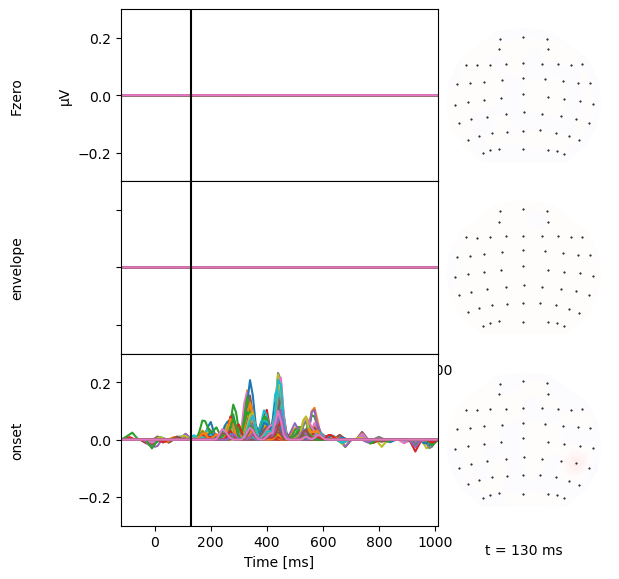

In [25]:
print(n_trf.x) #['Fzero', 'envelope', 'onset']
print(n_trf.h_scaled)
print(n_rows)

n_trf_butterfly = plot.TopoButterfly(n_trf.h_scaled, t=0.130, axh=2, w=6)
n_trf_butterfly

In [20]:
"""
# --- Plot the Regression Coefficient (r timeline) ---
# This plots the effect (beta, which is equivalent to correlation if predictors are standardized) over time.
# The default plot method marks significant time points (if any) based on the internal threshold.
res['VST'].plot()
plt.title("Regression Coefficient (r) Timeline for VST")
plt.xlabel("Time (ms)")
plt.ylabel("Coefficient (r)")
plt.show()

"""
p_all_VST = eelbrain.plot.TopoArray(res_all_lm, t=[0.1, 0.42, 0.7], head_radius=0.35) #, t=[0.120, 0.155, None], title=result
p_cb_all = p_all_VST.plot_colorbar(right_of=p_all_VST.axes[0], label='t')
p_all_VST.save(DST / "sub%s_F0" %str(sub_[0]))

"""
p_F0_VST = eelbrain.plot.TopoArray(res_F0, head_radius=0.35) #, t=[0.120, 0.155, None], title=result
p_cb_F0 = p_F0_VST.plot_colorbar(right_of=p_F0_VST.axes[0], label='t')
p_F0_VST
"""

"\np_F0_VST = eelbrain.plot.TopoArray(res_F0, head_radius=0.35) #, t=[0.120, 0.155, None], title=result\np_cb_F0 = p_F0_VST.plot_colorbar(right_of=p_F0_VST.axes[0], label='t')\np_F0_VST\n"

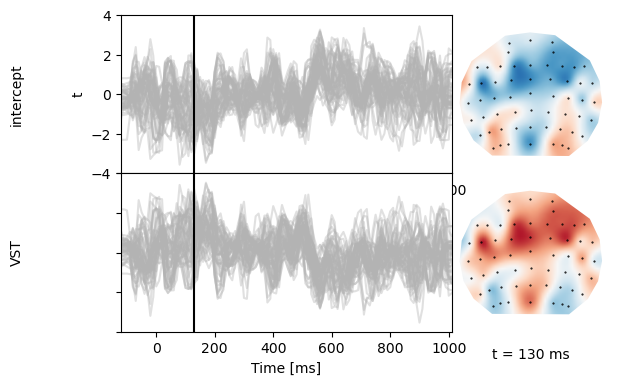

In [23]:
p_all_VST_butterfly = plot.TopoButterfly(res_all, t=0.130, axh=2, w=6)
p_all_VST_butterfly

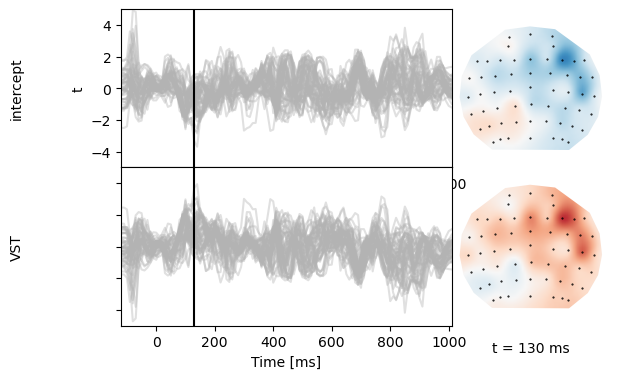

In [22]:
p_F0_VST_butterfly = plot.TopoButterfly(res_F0, t=0.130, axh=2, w=6)
p_F0_VST_butterfly

In [27]:
lm = testnd.LM(n_trfs['Fzero'], 'VST', data=n_trfs, samples=0) #, subject=str(subject))
pprint(lm)

<LM 'Fzero', 'VST', samples=0>


In [167]:
n_trfs = eelbrain.Dataset.from_caselist(['subject', 'model', "VST" ,*n_trf.x], n_rows)
print(n_trfs)
print(type(n_trfs))

subject   model                      VST
----------------------------------------
30        Fzero+envelope+env_onset   7  
27        Fzero+envelope+env_onset   8  
23        Fzero+envelope+env_onset   5.1
34        Fzero+envelope+env_onset   7.2
24        Fzero+envelope+env_onset   6.1
19        Fzero+envelope+env_onset   6.7
20        Fzero+envelope+env_onset   5.2
13        Fzero+envelope+env_onset   8.2
17        Fzero+envelope+env_onset   7.5
39        Fzero+envelope+env_onset   7.7
10        Fzero+envelope+env_onset   6.7
29        Fzero+envelope+env_onset   6.4
15        Fzero+envelope+env_onset   8.4
28        Fzero+envelope+env_onset   8.8
11        Fzero+envelope+env_onset   7.3
38        Fzero+envelope+env_onset   7.3
16        Fzero+envelope+env_onset   6.4
12        Fzero+envelope+env_onset   7.8
21        Fzero+envelope+env_onset   5.3
36        Fzero+envelope+env_onset   7.3
32        Fzero+envelope+env_onset   6.6
25        Fzero+envelope+env_onset   7.9
35        Fzero+

In [166]:
lmsLIST = []

for trf_subject in n_trfs:
    print(trf_subject['Fzero'])
    #print(trf_subject[3].x) # Fzero data
    #print(trf_subject[2]) # VST
    #n_rows.append([n_subj, model, VST_scoreFLOAT, *n_trf.h_scaled])
    #lm = testnd.LM(trf_subject[3], trf_subject[1], data=trf_subject, samples=0, subject=str(subject))
    #print(lm)
    #lms.append(lm)
#print(lmsLIST)

TypeError: string indices must be integers, not 'str'

In [135]:
# Basic regression: TRF ~ language_score
F0_VST_res = testnd.LM('Fzero', 'VST', data=n_trfs)
print(F0_VST_res)

Permutation test:   0%|          | 0/10000 [00:00<?, ? permutations/s]

<LM 'Fzero', 'VST', samples=10000, 'intercept': p = .114, 'VST': p = .096>


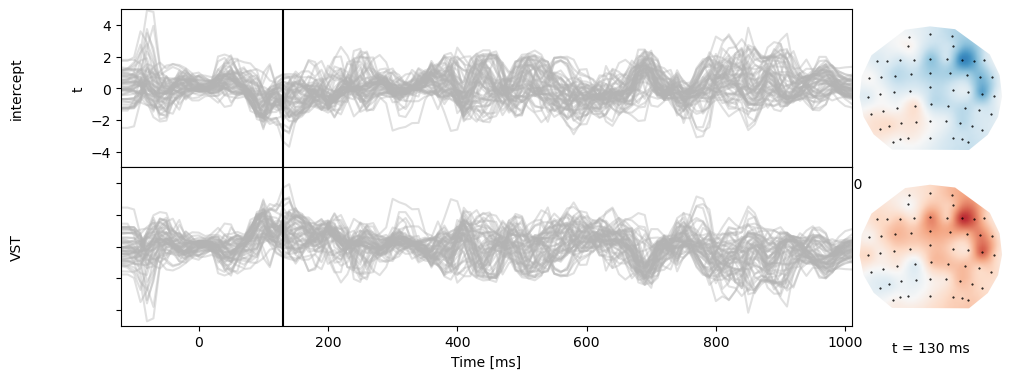

In [145]:
p_F0_VST = eelbrain.plot.TopoButterfly(F0_VST_res, t=0.130, axh=2, w=10)
#p_F0_bar = p_F0.plot_colorbar(label="F0", width=0.1)
p_F0_VST

In [21]:
F0_NDVarLIST = []
for item in n_VST_trf_hscaledLIST:
    F0_NDVarLIST.append(item[2].x) #F0_NDVar = item[2]
    #print(item[2].x)

print(F0_NDVarLIST)

[array([[-3.09309692e-06, -2.18063333e-05, -4.49272328e-05, ...,
         0.00000000e+00, -9.10822116e-21,  3.38037074e-21],
       [-1.82211191e-22, -3.64422382e-22,  5.58021772e-22, ...,
         1.45768953e-21,  7.28844764e-22,  0.00000000e+00],
       [ 0.00000000e+00, -1.92657228e-21, -7.22464604e-22, ...,
        -5.35464629e-06, -7.93280931e-07, -3.13357350e-21],
       ...,
       [ 3.81414146e-21,  3.17845122e-22,  1.54949497e-21, ...,
        -4.44983170e-21, -4.44983170e-21, -6.35690243e-21],
       [ 5.09115677e-21, -1.27278919e-21, -1.82963446e-21, ...,
        -3.81836758e-21, -4.77295947e-21, -2.54557839e-21],
       [ 5.08683531e-21,  6.35854414e-22,  7.94818017e-22, ...,
        -5.08683531e-21, -3.17927207e-21, -7.63025296e-21]]), array([[ 1.24414675e-21,  1.24414675e-21, -4.66555031e-22, ...,
         0.00000000e+00,  3.11036687e-21, -2.48829350e-21],
       [ 3.02493094e-21,  4.23490331e-21,  3.62991713e-21, ...,
         1.24778401e-21,  3.02493094e-22, -2.41994475

In [127]:
F0_VST_cor = np.corrcoef(F0_NDVarLIST, VST_df['VST'])

ValueError: m has more than 2 dimensions

In [118]:
## (not sure about the correctness) Find the F0 & VST's correlation ##
F0_VST_corrtest = eelbrain.testnd.Correlation('Fzero', 'VST', match='subject', ds=n_trfs, tstart=0, pmin=0.01)
F0_VST_corrtest_clus = F0_VST_corrtest.find_clusters(0.01)
print(F0_VST_corrtest)
print(F0_VST_corrtest_clus)

p_F0 = eelbrain.plot.TopoArray(F0_VST_corrtest, clip='circle', axtitle="F0 & VST") #, t=[0.02, 0.08, 0.17, 0.22, 0.34, 0.77]
p_F0_bar = p_F0.plot_colorbar(label="F0", width=0.1)

Permutation test:   0%|          | 0/10000 [00:00<?, ? permutations/s]

<Correlation 'Fzero', 'VST', samples=10000, pmin=0.01, tstart=0, 12 clusters, p = 1.000>
id   n_sensors   tstart   tstop   duration   v   p   sig
--------------------------------------------------------


In [24]:

# Load in the VST's score in ESLs

VST_Score_STR_LIST = ['6.7', '7.3', '7.8', '8.2', '8.4', '6.4', '7.5', '6.7', '5.2', '5.3', '6.5'
                 , '5.1', '6.1', '7.9', '8.7', '8.0', '8.8', '6.4', '7.0', '7.4', '6.6', '7.2'
                 , '7.0', '7.3', '7.3', '7.7']  # 26 subs
VST_Score_float_LIST = [6.7, 7.3, 7.8, 8.2, 8.4, 6.4, 7.5, 6.7
                        , 5.2, 5.3, 6.5, 5.1, 6.1, 7.9, 8.7, 8.0
                        , 8.8, 6.4, 7.0, 7.4, 6.6, 7.2, 7.0, 7.3, 7.3, 7.7]

# exclude sub: 14 / 18 / 33 / 37
sub_idLIST = [10, 11, 12, 13, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27
              , 28, 29, 30, 31, 32, 34, 35, 36, 38, 39]
# Female = 1; Male = 2
sub_SexLIST = [ 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2]

ds = Dataset()
ds['sub_id'] = Var(np.asarray(VST_Score_float_LIST))
ds['VST_score'] = Var(np.asarray(VST_ScoreLIST))
ds['Sex'] = Var(np.asarray(sub_SexLIST))

print(ds)
'''
# initialize an empty Dataset:
ds = Dataset()
# numeric values are added as Var object:
ds['y'] = Var(numpy.random.normal(0, 1, 6))
# categorical data as represented in Factors:
ds['a'] = Factor(['a', 'b', 'c'], repeat=2)
# A variable that's equal in all cases can be assigned quickly:
ds[:, 'z'] = 0.
# check the result:
ds
'''

TypeError: x of type unicode (dtype dtype('<U3')): Var needs numerical data type. Consider using a Datalist instead.

In [126]:
VST_Score_STR_LIST = ['6.7', '7.3', '7.8', '8.2', '8.4', '6.4', '7.5', '6.7', '5.2', '5.3', '6.5'
                 , '5.1', '6.1', '7.9', '8.7', '8.0', '8.8', '6.4', '7.0', '7.4', '6.6', '7.2'
                 , '7.0', '7.3', '7.3', '7.7']  # 26 subs
tmpLIST = []
for i in VST_Score_STR_LIST:
    tmp = float(i)
    tmpLIST.append(tmp)
    
print(tmpLIST)

[6.7, 7.3, 7.8, 8.2, 8.4, 6.4, 7.5, 6.7, 5.2, 5.3, 6.5, 5.1, 6.1, 7.9, 8.7, 8.0, 8.8, 6.4, 7.0, 7.4, 6.6, 7.2, 7.0, 7.3, 7.3, 7.7]


In [3]:
## ESLs ##

#STIMULI = [str(i) for i in range(1, 13)]
DATA_ROOT = Path("/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results")  #Path("~").expanduser() / 'Data' / 'Alice'
#PREDICTOR_audio_DIR = DATA_ROOT / 'TRFs_pridictors/audio_predictors'
#PREDICTOR_word_DIR = DATA_ROOT / 'TRFs_pridictors/word_predictors'
EEG_DIR = DATA_ROOT / 'EEG_ESLs' / 'Alice_ESL_ICAed_fif'
ESL_SUBJECTS = [path.name for path in EEG_DIR.iterdir() if re.match(r'n_2_S\d*', path.name)]  #S01_alice-raw.fif
# Define a target directory for TRF estimates and make sure the directory is created
TRF_DIR = DATA_ROOT / 'TRFs_ESLs'
TRF_DIR.mkdir(exist_ok=True)
print(ESL_SUBJECTS)
print(len(ESL_SUBJECTS))  # 26

DST = TRF_DIR / 'ESLs_figures'
DST.mkdir(exist_ok=True)

['n_2_S019_ICAed_raw.fif', 'n_2_S020_ICAed_raw.fif', 'n_2_S021_ICAed_raw.fif', 'n_2_S022_ICAed_raw.fif', 'n_2_S023_ICAed_raw.fif', 'n_2_S026_ICAed_raw.fif', 'n_2_S024_ICAed_raw.fif', 'n_2_S012_ICAed_raw.fif', 'n_2_S013_ICAed_raw.fif', 'n_2_S015_ICAed_raw.fif', 'n_2_S016_ICAed_raw.fif', 'n_2_S011_ICAed_raw.fif', 'n_2_S010_ICAed_raw.fif', 'n_2_S029_ICAed_raw.fif', 'n_2_S027_ICAed_raw.fif', 'n_2_S028_ICAed_raw.fif', 'n_2_S030_ICAed_raw.fif', 'n_2_S031_ICAed_raw.fif', 'n_2_S017_ICAed_raw.fif', 'n_2_S025_ICAed_raw.fif', 'n_2_S032_ICAed_raw.fif', 'n_2_S034_ICAed_raw.fif', 'n_2_S035_ICAed_raw.fif', 'n_2_S036_ICAed_raw.fif', 'n_2_S038_ICAed_raw.fif', 'n_2_S039_ICAed_raw.fif']
26


In [11]:
### For ESLs  ###
#subj = 2
"""
subject_nSTR_p = "n_S%.3d_ICAed_raw.fif" %subj

raw = mne.io.read_raw_fif(EEG_DIR / f'{subject_nSTR_p}', preload=True)

montage_x = eelbrain.load.fiff.sensor_dim(raw.info)
#temp_data = eeg_.T *1e+6
eeg_concatenated = eelbrain.NDVar(temp_data, (time, montage_x), name='EEG', info={'unit': 'µV'})

SUBJECTS = ['1', '2', '3', '4', '5', '6', '7']
rows = []
for subject in SUBJECTS:
    trf = eelbrain.load.unpickle('Subj%s_TRFs_envelop_w_on.pickle'%(subject))
    rows.append([subject, trf.proportion_explained, trf.h[0].abs()])
    pass
data_env = eelbrain.Dataset.from_caselist(['subject', 'det', 'trf'], rows)
"""
#subj_sLIST = [3, 4, 5, 6, 7, 8]
subj_sLIST = []
for subj_name in ESL_SUBJECTS:
    subj_sLIST.append(int(subj_name[5:8]))
rowsLIST = []

# res.h[0] >> <NDVar 'gammatone': 57 sensor, 8 frequency, 114 time>

## TRFs Envelope  ##
for subj in  subj_sLIST:
    res = eelbrain.load.unpickle(TRF_DIR / Path('S%.3d/S%.3d envelope.pickle'%(subj, subj)))
    rowsLIST.append([subj, res.proportion_explained, res.h[0]])#.abs()])
data_env = eelbrain.Dataset.from_caselist(['subject', 'det', 'trf'], rowsLIST)
#pprint(rowsLIST)
#print(data_env)


#test that model predictive power on held-out data is > 0
test_envelope = eelbrain.testnd.TTestOneSample('det', ds=data_env, tail=1, pmin=0.05)
#p = eelbrain.plot.Topomap(test_envelope)
#cb = p.plot_colorbar(width=0.1)


# ## Envelope TRF
# Test the TRF with a one-sample *t*-test against 0. This tests the null-hypothesis that the electrical current direction at each time point was random across subjects. The systematic current directions shown below at anterior electrodes are typical of auditory responses. 

trf_envelope = eelbrain.testnd.TTestOneSample('trf', ds=data_env, pmin=0.05)
print(trf_envelope)  # print out the stats results
onesample_clus = trf_envelope.find_clusters(0.05)
print(onesample_clus) # print out the cluster result

# gammatone >> ,t=[0.87]
# gammatone_onset >> ,t=[0.42, 0.52]
#p1 = eelbrain.plot.TopoArray(trf_envelope, t=[0.13, 0.35, 0.66, 0.99], clip='circle', cmap='xpolar', h=4, w = 8) #, t=[0.08, 0.16, 0.22, 0.45]
#cb = p.plot_colorbar(width=0.1)

#p1.save(DST / 'ESLs_ALL26_Envelope TRF_envelop.png')

#x = trf的結果

<TTestOneSample 'trf', samples=10000, pmin=0.05, 32 clusters, p < .001>
id    n_sensors   tstart   tstop   duration   v         p        sig
--------------------------------------------------------------------
1     51          -0.12    0.45    0.57       3995.8    0        ***
265   36          0.56     0.82    0.26       -612.63   0.0176   *  
268   40          0.81     1.02    0.21       -968.33   0.0063   ** 


In [44]:
## TRF: envelope+onset ##
#subj_sLIST = [3, 4, 5, 6, 7, 8]

VST_Score_float_LIST = [6.7, 7.3, 7.8, 8.2, 8.4, 6.4, 7.5, 6.7
                        , 5.2, 5.3, 6.5, 5.1, 6.1, 7.9, 8.7, 8.0
                        , 8.8, 6.4, 7.0, 7.4, 6.6, 7.2, 7.0, 7.3, 7.3, 7.7]

rowsLIST = []
ESL_trf_valueLIST = []
for subj in  subj_sLIST:
    res = eelbrain.load.unpickle(TRF_DIR / Path('S%.3d/S%.3d envelope+onset.pickle'%(subj, subj)))
    rowsLIST.append([subj, res.proportion_explained, *res.h])#.abs()])
    print(res.h[0].mean())
    ESL_trf_value = res.h[0].mean()
    ESL_trf_valueLIST.append(ESL_trf_value)
    x_names = res.x
data_onset = eelbrain.Dataset.from_caselist(['subject', 'det', *x_names], rowsLIST)
print(len(data_onset['det']))
#pprint(rowsLIST)
#print(data_onset)

test_onset = eelbrain.testnd.TTestOneSample('det', ds=data_onset, tail=1, pmin=0.05)
# Paired t-test by specifying two measurement NDVars with matched cases
# Note that this presupposes that subjects are in the same order
test_onset_envelope = eelbrain.testnd.TTestRelated(data_onset['det'], data_env['det'], tail=1, pmin=0.05)

test_onsetEnv_VST = eelbrain.testnd.Correlation(data_onset['det'], VST_Score_float_LIST, pmin=0.05) #, VST_Score_float_LIST
print(test_onsetEnv_VST)

"""
p2 = eelbrain.plot.Topomap(
    [test_onset.masked_difference(), test_onset_envelope.masked_difference()], 
    axtitle=[['Envelope + Onsets\n', test_onset], ['Envelope + Onsets > Envelope\n', test_onset_envelope]],
    ncol=2, clip='circle')
cb = p.plot_colorbar(width=0.1)

p2.save(TRF_DIR / 'ESLs_ALL26_Envelope+onset-TRFs_topo.png')
"""

6.838001436339386e-05
-5.4747614650661744e-05
0.00016160100543757052
3.2817790089258233e-05
-1.3593926336308605e-06
-3.748589309531138e-05
-0.00010519903560069765
8.72704421873397e-05
0.0001268338976095209
0.0001623319995896173
3.707551041346056e-05
0.00021042372011901097
6.400687390992101e-05
2.2263260490407297e-05
0.00012121678465168771
6.754642454088437e-05
6.593054273109676e-05
0.0001350030778701139
0.00022542833692418182
-5.110546834923566e-05
-0.00015742023186621524
0.00013151482507438184
0.00024811480455524774
0.00012920642248897096
-1.2016517902944505e-05
-6.825176977531548e-05
26
<Correlation 'det', None, samples=10000, pmin=0.05, no clusters>


"\np2 = eelbrain.plot.Topomap(\n    [test_onset.masked_difference(), test_onset_envelope.masked_difference()], \n    axtitle=[['Envelope + Onsets\n', test_onset], ['Envelope + Onsets > Envelope\n', test_onset_envelope]],\n    ncol=2, clip='circle')\ncb = p.plot_colorbar(width=0.1)\n\np2.save(TRF_DIR / 'ESLs_ALL26_Envelope+onset-TRFs_topo.png')\n"

In [18]:
temp_h0 = res.h[0]
dir(temp_h0)

['__abs__',
 '__add__',
 '__and__',
 '__array_interface__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',


In [31]:
print(temp_h0.get_data().mean())

-6.825176977531548e-05


In [41]:
print(ESL_trf_valueLIST)

[array([[ 0.00000000e+00,  0.00000000e+00, -2.89120579e-20, ...,
         9.03501810e-21,  2.89120579e-20, -1.44560290e-20],
       [ 0.00000000e+00,  7.22801448e-20, -1.19047619e-05, ...,
         1.22247024e-03,  2.26190476e-04,  1.19047619e-05],
       [ 1.66666667e-04,  1.20833333e-03,  2.64583333e-03, ...,
         5.42101086e-20, -7.22801448e-21,  0.00000000e+00],
       ...,
       [ 5.35714286e-05,  3.61607143e-04,  6.69642857e-04, ...,
        -2.89120579e-20, -2.18469809e-20,  3.61400724e-20],
       [-2.89120579e-20, -2.89120579e-20, -1.44560290e-20, ...,
        -4.33680869e-20,  7.95081593e-20,  8.04116611e-20],
       [-5.78241159e-20,  0.00000000e+00, -2.89120579e-20, ...,
        -5.05961014e-20, -2.25875453e-20,  5.60171122e-20]]), array([[-8.67361738e-20,  5.78241159e-20, -1.66244333e-19, ...,
        -2.33657351e-19,  2.39977381e-20,  1.49402982e-19],
       [-5.78241159e-20,  8.67361738e-20,  7.22801448e-20, ...,
         1.13491593e-19,  3.59055394e-20,  5.47538905

In [45]:
VST_Array = np.array(VST_Score_float_LIST)
print(len(VST_Array))
ESL_trf_value_Array = np.array(ESL_trf_valueLIST)
print(len(ESL_trf_value_Array))

# Conducting pair t-test bwtween HCD & LCD evoked  #default= 雙尾檢定 >>這裡選"less" for單尾檢定 >> 因為是H-L，所以H放前面
corr_VST_OnsetEnv = stats.pearsonr(ESL_trf_value_Array, VST_Array)#, alternative='less')  
print(corr_VST_OnsetEnv)
print(type(corr_VST_OnsetEnv))


26
26
PearsonRResult(statistic=-0.2611446822340303, pvalue=0.19754025060083846)
<class 'scipy.stats._stats_py.PearsonRResult'>
